In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
transaction_df = pd.read_csv(r"C:\Users\DELL\Desktop\transaction_data.csv")
purchase_df = pd.read_csv(r"C:\Users\DELL\Desktop\purchase_behaviour.csv")

In [7]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
# Group by product name and sum total sales
top_products = (
    transaction_df.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

print("Top 3 Most Profitable Products:")
print(top_products)


Top 3 Most Profitable Products:
PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


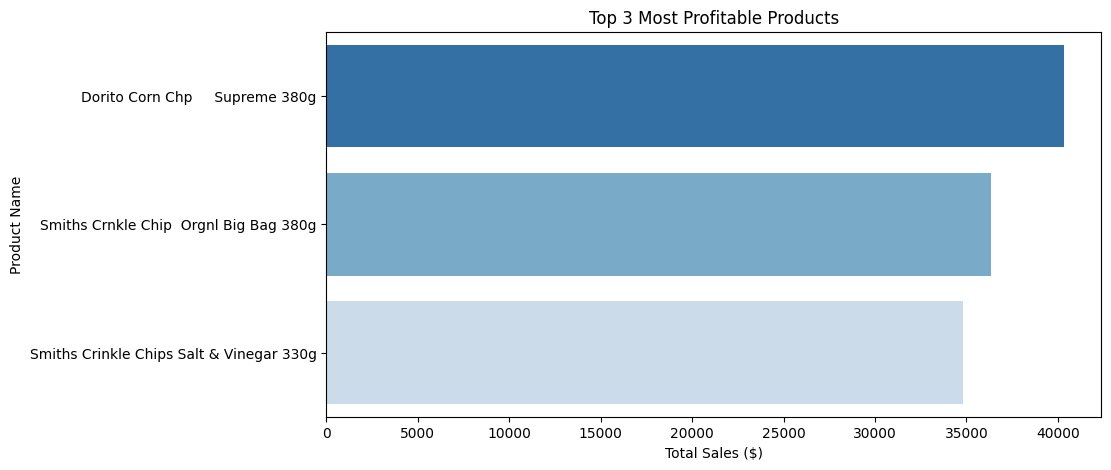

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()

In [10]:
# Merge transaction data with customer purchase behavior data
merged_df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")
print(merged_df.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE SINGLES/COUPL

In [11]:
# Count unique customers per segment
loyal_customers = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"]
    .nunique()
    .sort_values(ascending=False)
    .head(3)
)

print("Most Loyal Customer Segments:")
print(loyal_customers)

Most Loyal Customer Segments:
LIFESTAGE              PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES  Mainstream          8088
RETIREES               Mainstream          6479
OLDER SINGLES/COUPLES  Mainstream          4930
Name: LYLTY_CARD_NBR, dtype: int64


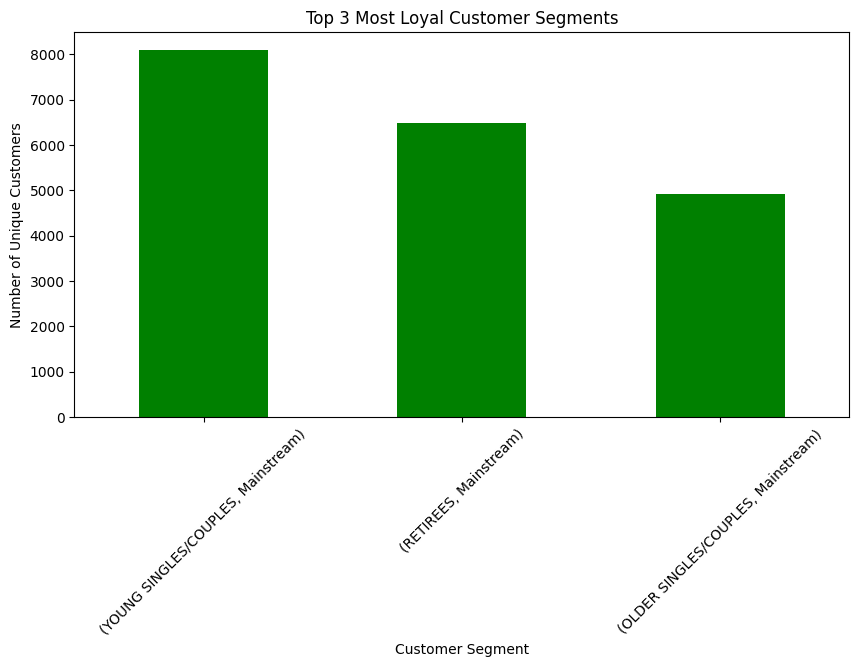

In [16]:
plt.figure(figsize=(10, 5))
loyal_customers.plot(kind="bar", color="green")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Unique Customers")
plt.title("Top 3 Most Loyal Customer Segments")
plt.xticks(rotation=45)
plt.show()


In [12]:
segment_products = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by=["LIFESTAGE", "TOT_SALES"], ascending=[True, False])
)

print(segment_products.head(10))  # Top 10 bestsellers by segment


                  LIFESTAGE PREMIUM_CUSTOMER  \
191  MIDAGE SINGLES/COUPLES       Mainstream   
120  MIDAGE SINGLES/COUPLES       Mainstream   
200  MIDAGE SINGLES/COUPLES       Mainstream   
145  MIDAGE SINGLES/COUPLES       Mainstream   
153  MIDAGE SINGLES/COUPLES       Mainstream   
148  MIDAGE SINGLES/COUPLES       Mainstream   
146  MIDAGE SINGLES/COUPLES       Mainstream   
149  MIDAGE SINGLES/COUPLES       Mainstream   
162  MIDAGE SINGLES/COUPLES       Mainstream   
125  MIDAGE SINGLES/COUPLES       Mainstream   

                                    PROD_NAME  TOT_SALES  
191  Smiths Crinkle Chips Salt & Vinegar 330g    2103.30  
120                      Cheezels Cheese 330g    2012.10  
200    Smiths Crnkle Chip  Orgnl Big Bag 380g    1976.50  
145                        Kettle Chilli 175g    1868.40  
153   Kettle Sweet Chilli And Sour Cream 175g    1792.80  
148                      Kettle Original 175g    1760.40  
146          Kettle Honey Soy    Chicken 175g    1728.00  

In [13]:
spending_patterns = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
)

print(spending_patterns)


LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              168363.25
YOUNG SINGLES/COUPLES   Mainstream          157621.60
RETIREES                Mainstream          155677.05
YOUNG FAMILIES          Budget              139345.85
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132263.15
RETIREES                Budget              113147.80
OLDER FAMILIES          Mainstream          103445.55
RETIREES                Premium              97646.05
YOUNG FAMILIES          Mainstream           92788.75
MIDAGE SINGLES/COUPLES  Mainstream           90803.85
YOUNG FAMILIES          Premium              84025.50
OLDER FAMILIES          Premium              81958.40
YOUNG SINGLES/COUPLES   Budget               61141.60
MIDAGE SINGLES/COUPLES  Premium              58432.65
YOUNG SINGLES/COUPLES   Premium              41642.10
MIDAGE SINGLES/COUPLES  Budget           

# Insights

In [ ]:

1)Best-Selling Products:
The most profitable items are large-pack chips, suggesting that customers favor bigger sizes
possibly for social gatherings, family use, or cost savings.
The top three products include Dorito Corn Chips Supreme 380g
Smiths Crinkle Chip Original Big Bag 380g, and Smiths Crinkle Chips Salt & Vinegar 330g.
Their popularity could be linked to well-known branding, taste preference, or promotional offers.

2)Customer Loyalty Patterns:
When looking at repeat buyers, young singles/couples, retirees, and older singles/couples emerge as the most loyal groups.
These segments consistently return for purchases, likely due to lifestyle factors.
Young individuals might be drawn to snacks for social occasions, while retirees and older couples may have habitual buying patterns, sticking to familiar brands.

3)Spending Behavior:
Customers classified as mainstream buyers (neither budget-conscious nor premium-focused) contribute the most revenue.
This could indicate that middle-market consumers prioritize a balance between quality and price,
making them the primary target for marketing efforts.

4)Product Preferences of Loyal Customers:
The most frequent buyers show a clear preference for well-established brands and convenient snack options.
Their purchasing habits suggest that brand recognition, pack size, and accessibility are key factors influencing their choices.

